$$\large \textbf{The Daily Stock Price Analysis and Forecasting with the ARIMA Model}$$ 
$$\small \textbf{The CopyRight @ Phuong V. Nguyen}$$

This Machine Learning program was written by Phuong V. Nguyen, based on the $\textbf{Anacoda 1.9.7}$ and $\textbf{Python 3.7}$.


$$\underline{\textbf{Main Contents}}$$

$\text{1. Main Job:}$ This program is to analyze and predict the close price of Vingroup Stock.

$\text{2. Dataset:}$ 
https://www.vndirect.com.vn/portal/thong-ke-thi-truong-chung-khoan/lich-su-gia.shtml

# 1.Preparing Problem

## 1.1. Loading Libraries

### Calling libraries

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#### Defining some varibales for printing the result

In [2]:
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

## 1.2. Loading Dataset

In [3]:
df = pd.read_excel("VICprice.xlsx")
df.head(5)

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME
0,2007-09-19,125.0,VIC,125.0,125.0,125.0,307840
1,2007-09-20,131.0,VIC,131.0,131.0,130.0,794790
2,2007-09-21,137.0,VIC,137.0,137.0,135.0,1224660
3,2007-09-24,143.0,VIC,143.0,143.0,143.0,551130
4,2007-09-25,150.0,VIC,150.0,150.0,148.0,962110


# 2. Data Process and Basic Analysis

## 2.1. Basic Analysis

### Checking the data size and format

In [4]:
df.shape

(3062, 7)

In [5]:
df.dtypes

DATE      datetime64[ns]
CLOSE            float64
TICKER            object
OPEN             float64
HIGH             float64
LOW              float64
VOLUME             int64
dtype: object

### Selecting a specific dataframe

In [6]:
closePrice = df[['DATE','CLOSE']]

In [7]:
closePrice.head(5)

,DATE,CLOSE
0,2007-09-19,125.0
1,2007-09-20,131.0
2,2007-09-21,137.0
3,2007-09-24,143.0
4,2007-09-25,150.0


In [8]:
closePrice['DATE'].min(), closePrice['DATE'].max()

(Timestamp('2007-09-19 00:00:00'), Timestamp('2019-12-27 00:00:00'))

### Checking whether data has missing values

In [9]:
closePrice.isnull().sum()

DATE     0
CLOSE    0
dtype: int64

No missing value in the dataframe "closePrice"

### Checking the statistical basic

In [10]:
closePrice.CLOSE.describe()

count    3062.000000
mean       79.169497
std        29.692855
min        33.300000
25%        51.500000
50%        75.000000
75%       101.000000
max       193.000000
Name: CLOSE, dtype: float64

### Checking the Data Type

In [11]:
closePrice.dtypes

DATE     datetime64[ns]
CLOSE           float64
dtype: object

### Visualizing the daily price of VIC

In [12]:
p_vin=closePrice
p_vin = p_vin.set_index('DATE')
p_vin.head()

,CLOSE
DATE,
2007-09-19,125.0
2007-09-20,131.0
2007-09-21,137.0
2007-09-24,143.0
2007-09-25,150.0


Text(0.5, 0, 'Source: VNDirect Securities Com.')

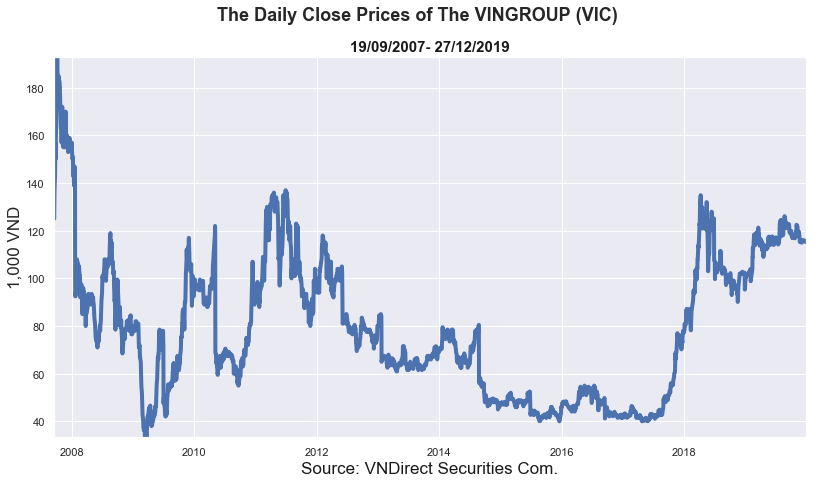

In [13]:
sns.set()
fig=plt.figure(figsize=(12,7))
plt.plot(p_vin.CLOSE['2007':'2019'],LineWidth=4)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Daily Close Prices of The VINGROUP (VIC)', fontsize=18,fontweight='bold')
plt.title('19/09/2007- 27/12/2019',fontsize=15,fontweight='bold',color='k')
plt.ylabel('1,000 VND',fontsize=17)
plt.xlabel('Source: VNDirect Securities Com.',fontsize=17,fontweight='normal',color='k')

### Plotting the  Box and Whisker Plots

#### The Box and Whisker Plots by Month in Year

In [14]:
p_vinmy=closePrice[['DATE','CLOSE']]
p_vinmy.head()

,DATE,CLOSE
0,2007-09-19,125.0
1,2007-09-20,131.0
2,2007-09-21,137.0
3,2007-09-24,143.0
4,2007-09-25,150.0


In [15]:
p_vinmy['Month-Year'] = p_vinmy['DATE'].dt.strftime('%b-%y')
p_vinmy.head()

,DATE,CLOSE,Month-Year
0,2007-09-19,125.0,Sep-07
1,2007-09-20,131.0,Sep-07
2,2007-09-21,137.0,Sep-07
3,2007-09-24,143.0,Sep-07
4,2007-09-25,150.0,Sep-07


In [16]:
p_vinmy = p_vinmy.set_index('DATE')
p_vinmy.head()

,CLOSE,Month-Year
DATE,,
2007-09-19,125.0,Sep-07
2007-09-20,131.0,Sep-07
2007-09-21,137.0,Sep-07
2007-09-24,143.0,Sep-07
2007-09-25,150.0,Sep-07


Text(0.5, 0, 'Source: VNDirect Securities Com.')

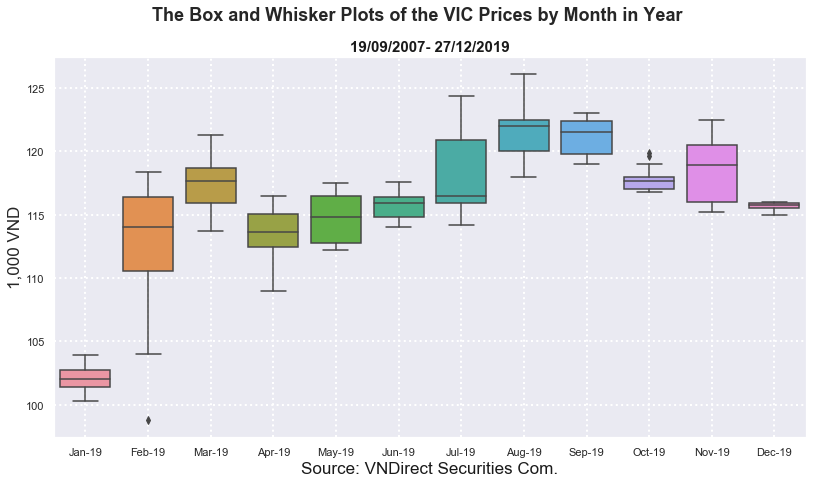

In [17]:
sns.set()
fig=plt.figure(figsize=(12,7))
sns.boxplot(x='Month-Year',y='CLOSE',data=p_vinmy['2019':'2019'])
#plt.autoscale(enable=True,axis='both',tight=True)
plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Box and Whisker Plots of the VIC Prices by Month in Year', fontsize=18,fontweight='bold')
plt.title('19/09/2007- 27/12/2019',fontsize=15,fontweight='bold',color='k')
plt.ylabel('1,000 VND',fontsize=17)
plt.xlabel('Source: VNDirect Securities Com.',fontsize=17,fontweight='normal',color='k')

By using the above Boxplot, you can compare the variance of the VIC prices across months

#### The Box and Whisker Plots by Month (Seasonality)

In [18]:
p_vinm=closePrice[['DATE','CLOSE']]
p_vinm.head()

,DATE,CLOSE
0,2007-09-19,125.0
1,2007-09-20,131.0
2,2007-09-21,137.0
3,2007-09-24,143.0
4,2007-09-25,150.0


#### Setting the year group

In [19]:
p_vinm['Month'] = p_vinm['DATE'].dt.strftime('%b')
p_vinm.head()

,DATE,CLOSE,Month
0,2007-09-19,125.0,Sep
1,2007-09-20,131.0,Sep
2,2007-09-21,137.0,Sep
3,2007-09-24,143.0,Sep
4,2007-09-25,150.0,Sep


#### Indexing Data

In [20]:
p_vinm=p_vinm.set_index('DATE')
p_vinm.head()

,CLOSE,Month
DATE,,
2007-09-19,125.0,Sep
2007-09-20,131.0,Sep
2007-09-21,137.0,Sep
2007-09-24,143.0,Sep
2007-09-25,150.0,Sep


#### Creating The Box and Whisker Plots by Month

Text(0.5, 0, 'Source: The Daily Close Price-based Calculations ')

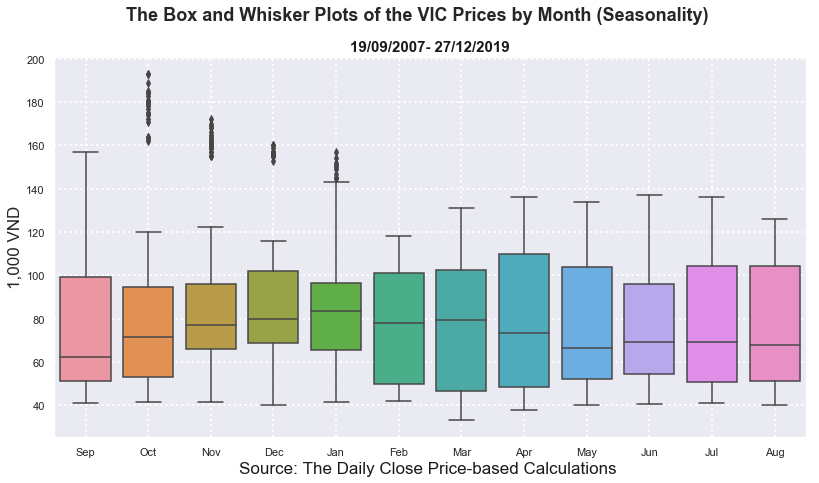

In [21]:
sns.set()
fig=plt.figure(figsize=(12,7))
sns.boxplot(x='Month',y='CLOSE',data=p_vinm['2007':'2019'])
#plt.autoscale(enable=True,axis='both',tight=True)
plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Box and Whisker Plots of the VIC Prices by Month (Seasonality)', fontsize=18,fontweight='bold')
plt.title('19/09/2007- 27/12/2019',fontsize=15,fontweight='bold',color='k')
plt.ylabel('1,000 VND',fontsize=17)
plt.xlabel('Source: The Daily Close Price-based Calculations ',fontsize=17,fontweight='normal',color='k')

#### The Box and Whisker Plots by Year (Trend)

In [22]:
p_viny=closePrice[['DATE','CLOSE']]
p_viny.head()

,DATE,CLOSE
0,2007-09-19,125.0
1,2007-09-20,131.0
2,2007-09-21,137.0
3,2007-09-24,143.0
4,2007-09-25,150.0


#### Setting the year group

In [23]:
p_viny['Year'] = p_viny['DATE'].dt.strftime('%Y')
p_viny.head()

,DATE,CLOSE,Year
0,2007-09-19,125.0,2007
1,2007-09-20,131.0,2007
2,2007-09-21,137.0,2007
3,2007-09-24,143.0,2007
4,2007-09-25,150.0,2007


#### Indexing Data

In [24]:
p_viny=p_viny.set_index('DATE')
p_viny.head()

,CLOSE,Year
DATE,,
2007-09-19,125.0,2007
2007-09-20,131.0,2007
2007-09-21,137.0,2007
2007-09-24,143.0,2007
2007-09-25,150.0,2007


#### Creating The Box and Whisker Plots by Year

Text(0.5, 0, 'Source: VNDirect Securities Com.')

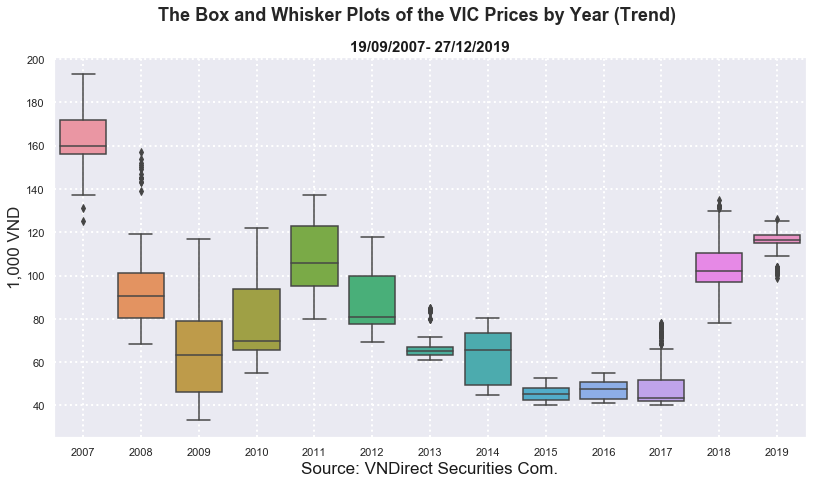

In [25]:
sns.set()
fig=plt.figure(figsize=(12,7))
sns.boxplot(x='Year',y='CLOSE',data=p_viny['2007':'2019'])
#plt.autoscale(enable=True,axis='both',tight=True)
plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Box and Whisker Plots of the VIC Prices by Year (Trend)', fontsize=18,fontweight='bold')
plt.title('19/09/2007- 27/12/2019',fontsize=15,fontweight='bold',color='k')
plt.ylabel('1,000 VND',fontsize=17)
plt.xlabel('Source: VNDirect Securities Com.',fontsize=17,fontweight='normal',color='k')

By using the Box and Whisker Plot above, one can compare the variance of the VIC prices across years. For example, the VIC prices in the five years of 2009, 2010, 2011, 2012 and 2014 are the most volatile since it started to list in 2007. Oppositely, this stock price was the most stable in 2013 and 2019.

Text(0.5, 0, 'Nguồn: Tính toán dựa trên thống kê giá đóng cửa hàng ngày của Cổ Phiếu VINGROUP')

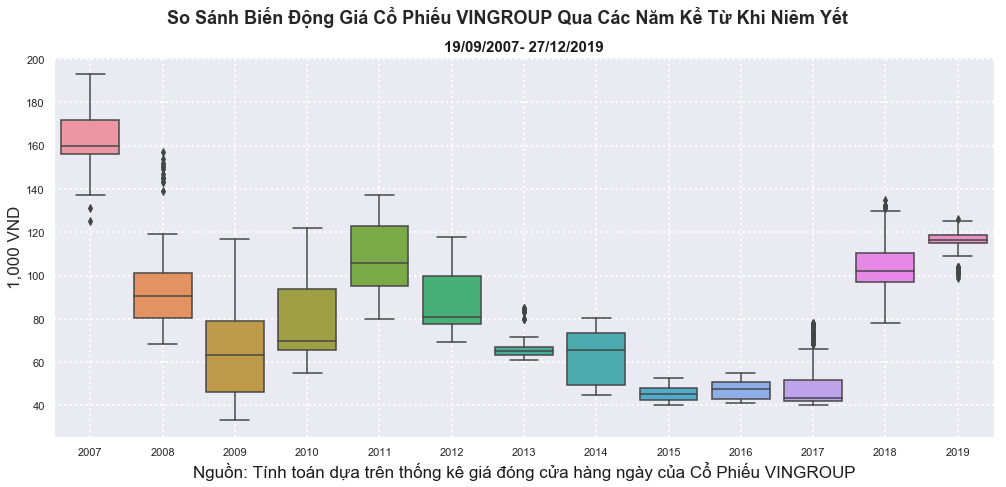

In [26]:
sns.set()
fig=plt.figure(figsize=(15,7))
sns.boxplot(x='Year',y='CLOSE',data=p_viny['2007':'2019'])
#plt.autoscale(enable=True,axis='both',tight=True)
plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('So Sánh Biến Động Giá Cổ Phiếu VINGROUP Qua Các Năm Kể Từ Khi Niêm Yết', fontsize=18,fontweight='bold')
plt.title('19/09/2007- 27/12/2019',fontsize=15,fontweight='bold',color='k')
plt.ylabel('1,000 VND',fontsize=17)
plt.xlabel('Nguồn: Tính toán dựa trên thống kê giá đóng cửa hàng ngày của Cổ Phiếu VINGROUP',fontsize=17,fontweight='normal',color='k')

Kể từ cổ phiếu VINGROUP chào sàn ngày 19/09/2007, thì biến động giá của mã cổ phiếu Tập đoàn này, mã giao dịch: $\textbf{VIC}$, có 3 đặc điểm cơ bản sau.

1. $\textbf{Biến động nhiều nhất}$ trong 5 năm: 2009,2010, 2011, 2012, và 2014. Nên có thể nói, anh em theo chiến lược lướt sóng thì sẽ chịu $\textbf{rủi ro thua lỗ nhiều nhất}$ trong 5 năm này.

2. $\textbf{Ổn định nhất}$ trong hai năm: 2013 và 2019, giá cổ phiếu VIC lại. Ví dụ, giá đóng cửa của mã này trong năm 2019 phổ biến nhất ở mức quanh đâu đó khoảng 116,000 VND/1 Cổ Phiếu. Nên anh em mua cổ phiếu này đầu năm và bán chốt lời cuối năm trên mỗi cổ phiếu thì $\textbf{lời lãi tiêu tết cũng không được là bao}$

3. $\textbf{Nhiều bất thường nhất}$ trong năm 2008, và điều này có thể giải thích bởi tác động của Khủng Hoảng Tài chính toàn cầu năm 2008. Những $\textbf{biến động giá bất thường}$ này cũng xảy ra ở các năm 2017 và $\textbf{năm rồi 2019}$.

# Computing the Return

In [27]:
closePrice['Return'] = closePrice['CLOSE'].pct_change()
closePrice.head()

,DATE,CLOSE,Return
0,2007-09-19,125.0,NaN
1,2007-09-20,131.0,0.048000
2,2007-09-21,137.0,0.045802
3,2007-09-24,143.0,0.043796
4,2007-09-25,150.0,0.048951


In [28]:
r_vin=closePrice[['DATE','Return']]
r_vin.head()

,DATE,Return
0,2007-09-19,NaN
1,2007-09-20,0.048000
2,2007-09-21,0.045802
3,2007-09-24,0.043796
4,2007-09-25,0.048951


In [29]:
r_vin=r_vin.set_index('DATE')

In [30]:
r_vin.head() 

,Return
DATE,
2007-09-19,NaN
2007-09-20,0.048000
2007-09-21,0.045802
2007-09-24,0.043796
2007-09-25,0.048951


Text(0.5, 0, 'Source: The Daily Close Price-based Calculations')

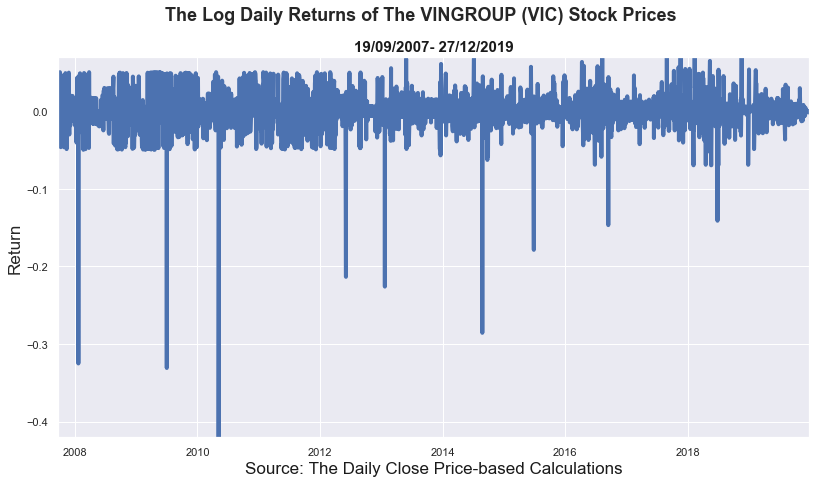

In [31]:
sns.set()
fig=plt.figure(figsize=(12,7))
plt.plot(r_vin.Return['2007':'2019'],LineWidth=4)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Log Daily Returns of The VINGROUP (VIC) Stock Prices', fontsize=18,fontweight='bold')
plt.title('19/09/2007- 27/12/2019',fontsize=15,fontweight='bold',color='k')
plt.ylabel('Return',fontsize=17)
plt.xlabel('Source: The Daily Close Price-based Calculations',fontsize=17,fontweight='normal',color='k')

# Plotting Histogram and Density

Text(0.5, 0, 'Source: The Daily Close Price-based Calculations')

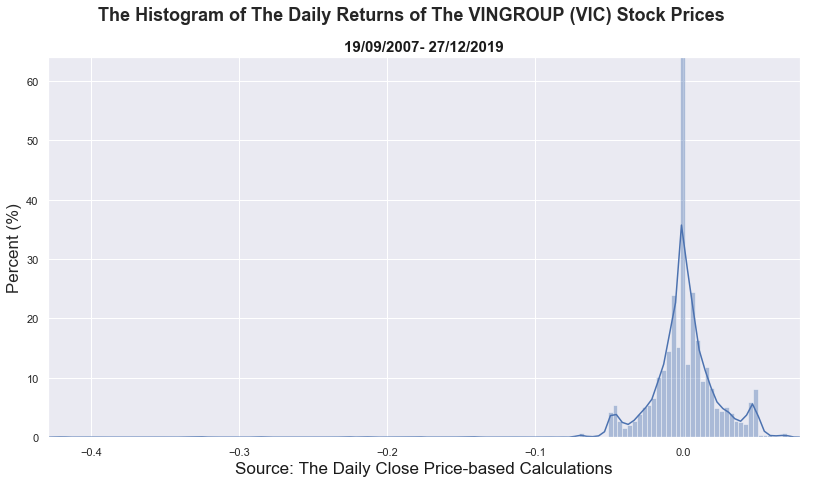

In [32]:
sns.set()
fig=plt.figure(figsize=(12,7))
sns.distplot(closePrice[['Return']],bins=150)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Histogram of The Daily Returns of The VINGROUP (VIC) Stock Prices', fontsize=18,fontweight='bold')
plt.title('19/09/2007- 27/12/2019',fontsize=15,fontweight='bold',color='k')
plt.ylabel('Percent (%)',fontsize=17)
plt.xlabel('Source: The Daily Close Price-based Calculations',fontsize=17,fontweight='normal',color='k')

#### Looking at the Statistical Basic of the return

In [33]:
closePrice[['Return']].describe()

,Return
count,3061.000000
mean,0.000328
std,0.025523
min,-0.420168
25%,-0.008772
50%,0.000000
75%,0.009836
max,0.069922


#### Finding the most populuar return

In [34]:
closePrice[['Return']].mode()

,Return
0,0.0


#### Checking right- or left- Skewness

In [35]:
closePrice[['Return']].skew()

Return   -3.864386
dtype: float64

It implies the daily return has larger towards the left hand side of the distribution or on the left from the peak of the distribution.

#### Checking thin- or fat distribution

In [36]:
closePrice[['Return']].kurtosis()

Return    51.161315
dtype: float64

The distribution of the return shows a positive kurtusis. Accordingly, the peak is stepper and/or the tails are much fatter. It implies an investment on this stock suffers from a low risk since the variance of the return is small. 

# Plotting Autocorrelation and Partial Autocorrelation Functions 

$\textbf{The purpose of  ACF}$: Autocorrelation plots are a commonly-used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags. If random, such autocorrelations should be near zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly non-zero.

In addition, autocorrelation plots are used in the model identification stage for Box-Jenkins autoregressive, moving average time series models.

$\textbf{The purpose of  PACF}$: Partial autocorrelation plots are a commonly used tool for model identification in Box-Jenkins models.

Specifically, partial autocorrelations are useful in identifying the order of an autoregressive model. The partial autocorrelation of an AR(p) process is zero at lag p+1 and greater. If the sample autocorrelation plot indicates that an AR model may be appropriate, then the sample partial autocorrelation plot is examined to help identify the order. We look for the point on the plot where the partial autocorrelations essentially become zero. Placing a 95 % confidence interval for statistical significance is helpful for this purpose.

The approximate 95 % confidence interval for the partial autocorrelations are at $±2/ \sqrt{N}$.

In [42]:
from statsmodels.tsa.stattools import acf 
from statsmodels.tsa.stattools import pacf 
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf 
from matplotlib import pyplot

#### For price

Text(0.5, 0, 'A Number of Lags')

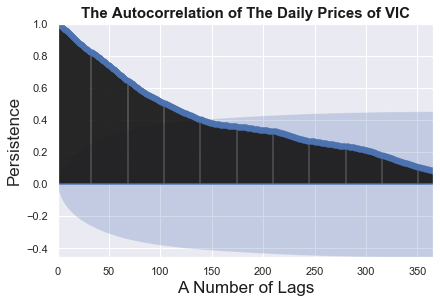

In [144]:
plot_acf(closePrice[['CLOSE']],lags=365)
plt.autoscale(enable=True,axis='both',tight=True)
plt.title('The Autocorrelation of The Daily Prices of VIC',fontsize=15,fontweight='bold',color='k')
plt.ylabel('Persistence',fontsize=17)
plt.xlabel('A Number of Lags',fontsize=17,fontweight='normal',color='k')

In [106]:
vin_acf, vin_confident=acf(closePrice[['CLOSE']],nlags=350,alpha=0.5)

In [ ]:
sns.set()
fig=plt.figure(figsize=(12,7))
ax = plt.plot(vin_acf,label='observed',LineWidth=4)
ax.fill_between(vin_confident.iloc[:, 0],
                vin_confident.iloc[:, 1], color='k', alpha=.2)

In [ ]:
sns.set()
fig=plt.figure(figsize=(12,7))
sns.distplot(closePrice[['Return']],bins=150)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Histogram of The Daily Returns of The VINGROUP (VIC) Stock Prices', fontsize=18,fontweight='bold')
plt.title('19/09/2007- 27/12/2019',fontsize=15,fontweight='bold',color='k')
plt.ylabel('Percent (%)',fontsize=17)
plt.xlabel('Source: The Daily Close Price-based Calculations',fontsize=17,fontweight='normal',color='k')

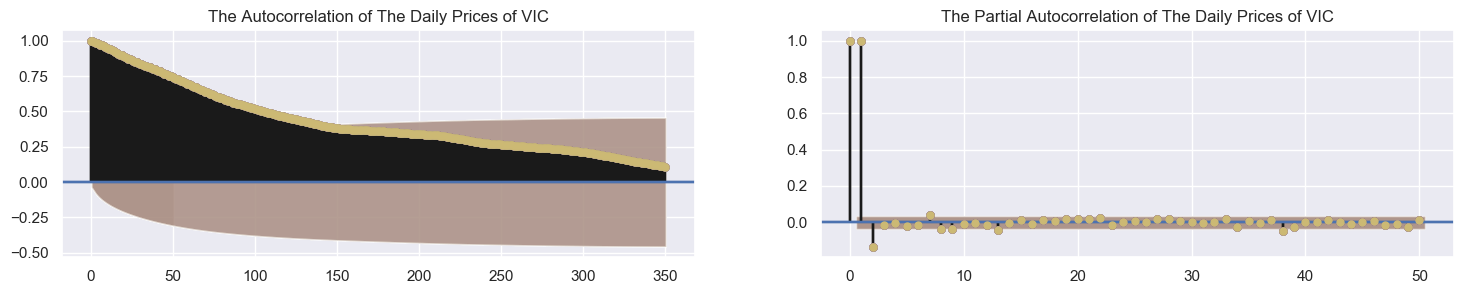

In [92]:
plot_acf(closePrice[['CLOSE']], lags=350, title='The Autocorrelation of The Daily Prices of VIC',ax=axes[0])
plot_pacf(closePrice[['CLOSE']], lags=50,title='The Partial Autocorrelation of The Daily Prices of VIC', ax=axes[1])

Based on the above ACF, the sample ACF of the daily prices of VIC is large in magnitude, and decays slowly, then this daily price might have $\textbf{long memory}$.

#### For Returns

Text(0.5, 0, 'A Number of Lags')

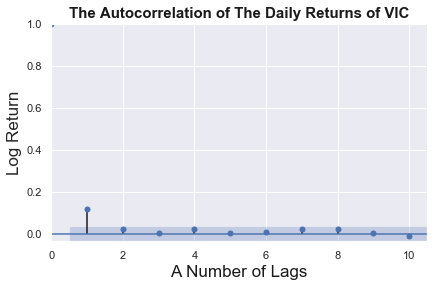

In [55]:
plot_acf(r_vin.loc['2007-09-20':'2019'],lags=10) 
plt.autoscale(enable=True,axis='both',tight=True)
plt.title('The Autocorrelation of The Daily Returns of VIC',fontsize=15,fontweight='bold',color='k')
plt.ylabel('Log Return',fontsize=17)
plt.xlabel('A Number of Lags',fontsize=17,fontweight='normal',color='k')

$\textbf{Note}$: Identification of an MA model is often best done with the ACF rather than the PACF

Based on the ACF, the MA(1) is an appropriate one

Text(0.5, 0, 'A Number of Lags')

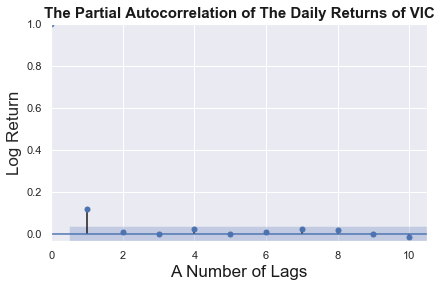

In [54]:
plot_pacf(r_vin.loc['2007-09-20':'2019'],lags=10) 
plt.autoscale(enable=True,axis='both',tight=True)
plt.title('The Partial Autocorrelation of The Daily Returns of VIC',fontsize=15,fontweight='bold',color='k')
plt.ylabel('Log Return',fontsize=17)
plt.xlabel('A Number of Lags',fontsize=17,fontweight='normal',color='k')

Based on the PACF, the AR(1) is an appropiate model.

### 2.2. Data Process For Training Models

#### Picking up data

In [113]:
VIC=closePrice[['DATE','CLOSE']]
VIC.head()

,DATE,CLOSE
0,2007-09-19,125.0
1,2007-09-20,131.0
2,2007-09-21,137.0
3,2007-09-24,143.0
4,2007-09-25,150.0


### Indexing Data

In [114]:
VIC =VIC.set_index('DATE')
VIC.head()

,CLOSE
DATE,
2007-09-19,125.0
2007-09-20,131.0
2007-09-21,137.0
2007-09-24,143.0
2007-09-25,150.0


### Checking the Index of data

In [115]:
VIC.index

DatetimeIndex(['2007-09-19', '2007-09-20', '2007-09-21', '2007-09-24',
               '2007-09-25', '2007-09-26', '2007-09-27', '2007-09-28',
               '2007-10-01', '2007-10-02',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27'],
              dtype='datetime64[ns]', name='DATE', length=3062, freq=None)

We can see that it has no frequency (freq=None). This makes sense, since the index was created from a sequence of dates in our CSV file, without explicitly specifying any frequency for the time series.

We know that our data should be at a specific frequency as a daily basic, we can use the DataFrame’s asfreq() method to assign a frequency. If any date/times are missing in the data, new rows will be added for those date/times, which are either empty (NaN), or filled according to a specified data filling method such as forward filling or interpolation.

To this end, we use the function "asfreq('B')" to format our series a business day data

### Declearing the Frequency of Data as the Business Daily Basic

In [116]:
VIC=VIC.asfreq('B')#,method='ffill')
VIC=VIC.CLOSE
VIC.head()

DATE
2007-09-19    125.0
2007-09-20    131.0
2007-09-21    137.0
2007-09-24    143.0
2007-09-25    150.0
Freq: B, Name: CLOSE, dtype: float64

### Checking if Data contains Missing Values

In [117]:
VIC.isnull().sum()

141

It is $NOT$ good. Please, find an appropriate solution for fulfilling missing data after using the above function $\textbf{asfreq()}$

# 3. Performing Prediction

We use a number of forecasting tools as follows.

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation $ARIMA(p, d, q)$. These three parameters account for seasonality, trend, and noise in data:

### 2.1. Find the Optimal ARIMA Model

This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

## Setting a set of hyperparameters

In [131]:
p = d = q = range(0, 6)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [121]:
print(Bold + 'A Number of combinations: {}'.format(len(pdq)))

A Number of combinations: 8


In [122]:
print(Bold + 'Examples of parameter combinations for ARIMA...' + End)
print('ARIMA: {}'.format(pdq[1]))
print('ARIMA: {}'.format(pdq[2]))
print('ARIMA: {}'.format(pdq[3]))
print('ARIMA: {}'.format(pdq[4]))

Examples of parameter combinations for ARIMA...
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)
ARIMA: (0, 1, 1)
ARIMA: (1, 0, 0)


## Finding the Optimal Set of Hyperparameters 

In [128]:
Log_likelihood =list()
AIC=list()
BIC=list()
para=list()
HQIC=list()
print(Bold + 'Training ARIMA with a Number of Configuration:'+ End)
for param in pdq:
    mod=sm.tsa.statespace.SARIMAX(VIC,order=param,seasonal_order=(0, 0, 0, 0), 
                                               enforce_stationarity=False, enforce_invertibility=False)
    results= mod.fit()
    para.append(param)
    Log_likelihood.append(results.llf)
    AIC.append(results.aic)
    BIC.append(results.bic)
    HQIC.append(results.hqic)
    print('ARIMA{} - Log_likelihood:{} - AIC:{} - BIC:{} - HQIC:{}'.format(param,results.llf,results.aic, results.bic, results.hqic))
    
print(Bold +'The Optimal Choice Suggestions:'+End)
#print('The minimum value of Akaike Information Criterion (AIC):{}'.format(min(AIC)))
#print('The minimum value of Bayesian Information Criterion (BIC: {})'.format(min(BIC)))
#print(Bold + 'Descending the Values of AIC and BIC:'+End)
ModSelect=pd.DataFrame({'Hyperparameters':para,'Log_likelihood':Log_likelihood,'AIC':AIC,'BIC':BIC,'HQIC':HQIC}).sort_values(by=['Log_likelihood','AIC','BIC','HQIC'],ascending=False)
ModSelect


Training ARIMA with a Number of Configuration:
ARIMA(0, 0, 0) - Log_likelihood:-17925.588830987337 - AIC:35853.177661974674 - BIC:35859.24919286823 - HQIC:35855.354348306864
ARIMA(0, 0, 1) - Log_likelihood:-15951.771780629797 - AIC:31907.543561259594 - BIC:31919.685998339533 - HQIC:31911.89677912824
ARIMA(0, 1, 0) - Log_likelihood:-7030.70393872251 - AIC:14063.40787744502 - BIC:14069.47909598499 - HQIC:14065.584486379345
ARIMA(0, 1, 1) - Log_likelihood:-7004.690068905624 - AIC:14013.380137811248 - BIC:14025.521949988823 - HQIC:14017.733200829805
ARIMA(1, 0, 0) - Log_likelihood:-7035.255805411924 - AIC:14074.511610823847 - BIC:14086.654672610961 - HQIC:14078.864983488225
ARIMA(1, 0, 1) - Log_likelihood:-7009.130142389164 - AIC:14024.260284778327 - BIC:14042.473940398237 - HQIC:14030.790111581298
ARIMA(1, 1, 0) - Log_likelihood:-7008.965565012115 - AIC:14021.93113002423 - BIC:14034.07356710417 - HQIC:14026.284347892877
ARIMA(1, 1, 1) - Log_likelihood:-7004.621079674452 - AIC:14015.242159

,Hyperparameters,Log_likelihood,AIC,BIC,HQIC
7,"(1, 1, 1)",-7004.621080,14015.242159,14033.454878,14021.771754
3,"(0, 1, 1)",-7004.690069,14013.380138,14025.521950,14017.733201
6,"(1, 1, 0)",-7008.965565,14021.931130,14034.073567,14026.284348
5,"(1, 0, 1)",-7009.130142,14024.260285,14042.473940,14030.790112
2,"(0, 1, 0)",-7030.703939,14063.407877,14069.479096,14065.584486
4,"(1, 0, 0)",-7035.255805,14074.511611,14086.654673,14078.864983
1,"(0, 0, 1)",-15951.771781,31907.543561,31919.685998,31911.896779
0,"(0, 0, 0)",-17925.588831,35853.177662,35859.249193,35855.354348


## 2.2. Fitting the ARIMA model

In [129]:
VIC.head()

DATE
2007-09-19    125.0
2007-09-20    131.0
2007-09-21    137.0
2007-09-24    143.0
2007-09-25    150.0
Freq: B, Name: CLOSE, dtype: float64

In [133]:
mod = sm.tsa.statespace.SARIMAX(VIC, order=(6, 1, 6),enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(Bold + 'The estimated ARIMA(6,1,6) Model'+ End)
#print(results.summary().tables[1])
print(results.summary())

The estimated ARIMA(6,1,6) Model
                           Statespace Model Results                           
Dep. Variable:                  CLOSE   No. Observations:                 3203
Model:               SARIMAX(6, 1, 6)   Log Likelihood               -6938.164
Date:                Thu, 02 Jan 2020   AIC                          13902.328
Time:                        20:06:28   BIC                          13981.229
Sample:                    09-19-2007   HQIC                         13930.618
                         - 12-27-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2521      0.159      1.588      0.112      -0.059       0.563
ar.L2         -0.8853      0.165     -5.370      0.000      -1.208      -0.562
ar.L3         -0.05

## 2.1. Performing Model Diagnostics

We should always run model diagnostics to investigate any unusual behavior.

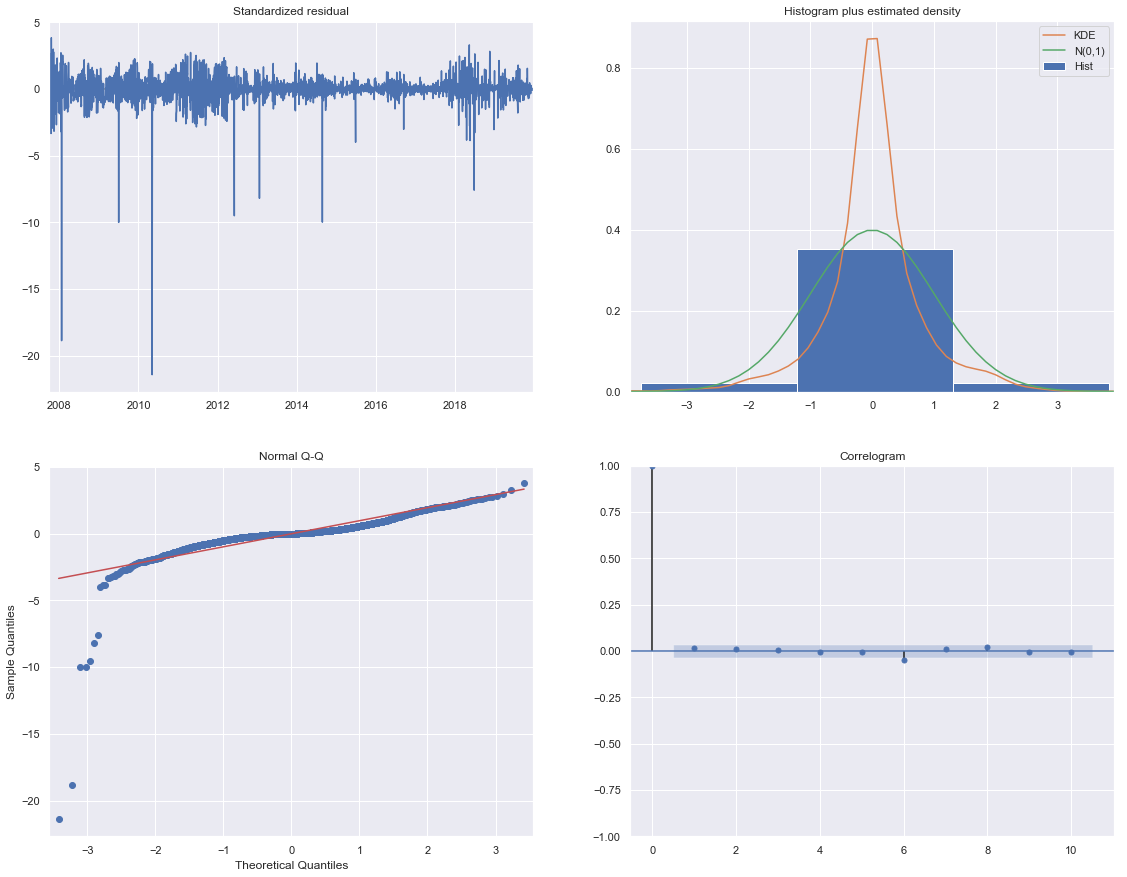

In [136]:
results.plot_diagnostics(figsize=(17,15))
plt.show()

Our primary concern is to ensure that the residuals of our model are $\textbf{uncorrelated}$ and $\textbf{normally distributed with zero-mean}$. If the seasonal ARIMA model does not satisfy these properties, it should be further improved.

In this case, our model diagnostics suggests that the model residuals are not normally distributed based on the following:

1. The residuals over time (top left plot) seem to display an obvious seasonality (downward trend) and moight not a obvious white noise process.


2. In the top right plot, we see that the red KDE line is far from the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are not normally distributed. 

3. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) do not follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are not normally distributed.

see more $\text{Q-Q Plot}$ at https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

4. The autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself, but several espisodes have high correlation with their own lagged values.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

It is not good enough since our model diagnostics suggests that the model residuals are not near normally distributed.

## 2.4. Validating Forecasts 

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

### Doing In-Sample Forecast

In [137]:
VIC.index

DatetimeIndex(['2007-09-19', '2007-09-20', '2007-09-21', '2007-09-24',
               '2007-09-25', '2007-09-26', '2007-09-27', '2007-09-28',
               '2007-10-01', '2007-10-02',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27'],
              dtype='datetime64[ns]', name='DATE', length=3203, freq='B')

In [138]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-06'), dynamic=False)

In [362]:
pred.predicted_mean

DATE
2018-06-06    121.274566
2018-06-07    124.469439
2018-06-08    124.168824
2018-06-11    124.086978
2018-06-12    124.273723
2018-06-13    124.523567
2018-06-14    128.506053
2018-06-15    125.584930
2018-06-18    123.338279
2018-06-19    123.429579
2018-06-20    122.899393
2018-06-21    125.096640
2018-06-22    123.815549
2018-06-25    122.804116
2018-06-26    123.887684
2018-06-27    123.611656
2018-06-28    125.435507
2018-06-29    104.961429
2018-07-02    107.965337
2018-07-03    106.755240
2018-07-04     98.892426
2018-07-05    105.495671
2018-07-06    106.901285
2018-07-09    106.451665
2018-07-10    104.765261
2018-07-11    102.708280
2018-07-12    104.798137
2018-07-13    102.439826
2018-07-16    102.799082
2018-07-17    102.568964
                 ...    
2019-11-18    119.686700
2019-11-19    118.002689
2019-11-20    116.973534
2019-11-21    115.725098
2019-11-22    115.140205
2019-11-25    116.300918
2019-11-26    115.972901
2019-11-27    115.208645
2019-11-28    115.80

### Plotting

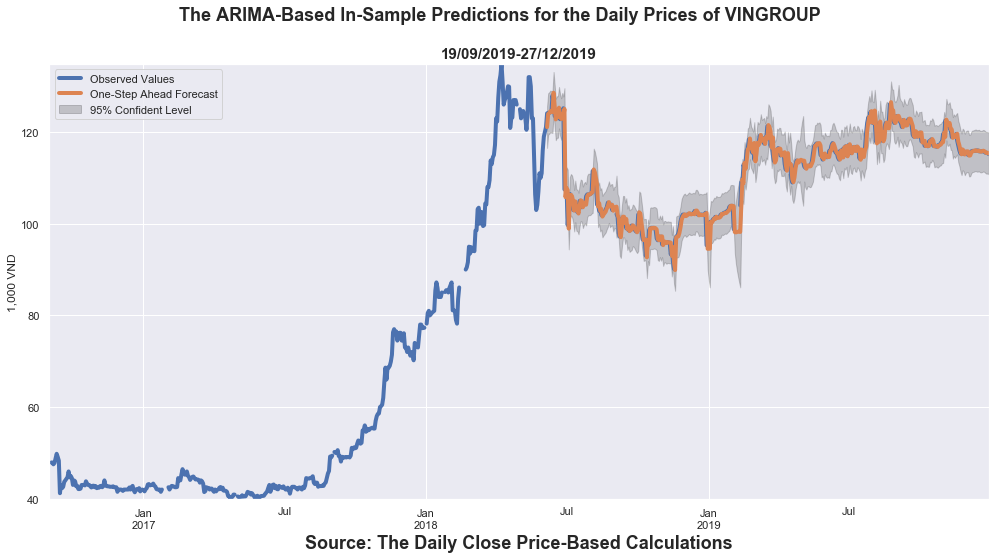

In [161]:
pred_ci = pred.conf_int()
sns.set()
fig=plt.figure(figsize=(15,8))
ax = VIC['2016-09':].plot(label='Observed Values',LineWidth=4)
plt.autoscale(enable=True,axis='both',tight=True)
pred.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast',LineWidth=4)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2,  label='95% Confident Level',)
fig.suptitle('The ARIMA-Based In-Sample Predictions for the Daily Prices of VINGROUP ', fontsize=18,fontweight='bold')
plt.title('19/09/2019-27/12/2019',fontsize=15,fontweight='bold')
ax.set_xlabel('Source: The Daily Close Price-Based Calculations',fontsize=18,fontweight='bold')
ax.set_ylabel('1,000 VND')
#plt.grid(linestyle='--',which='both',linewidth=2)
plt.legend()
plt.show()

### Computing MSE

In statistics, the $\text{Mean Squared Error (MSE)}$ of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

In [141]:
y_forecasted = pred.predicted_mean
y_truth = VIC['2018-06-06':]
se=(y_forecasted - y_truth)**2
mse=se.mean()
print(Bold+'The Mean Squared Error (MSE): {}'.format(round(mse, 2)))

The Mean Squared Error (MSE): 3.11


### Computing RMSE

In [366]:
print(Bold + 'The Root Mean Squared Error (RMSE) {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error (RMSE) 1.77


In [367]:
VIC.describe()

count    3062.000000
mean       79.169497
std        29.692855
min        33.300000
25%        51.500000
50%        75.000000
75%       101.000000
max       193.000000
Name: CLOSE, dtype: float64

$\text{Root Mean Square Error (RMSE)}$ tells us that our model was able to forecast the daily price of VIC in the test set within $17,700$ VND of the actual prices. Our daily close price of VIC ranges from around $33,300$ VND to $193,000$ VND. In my opinion, the $ARIMA(6,1,6)$ is a pretty good model so far.

### Producing and visualizing Out-Of-Sample forecasts

In [142]:
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()
pred_uc.predicted_mean

2019-12-30    115.147273
2019-12-31    115.260115
2020-01-01    115.360705
2020-01-02    115.322356
2020-01-03    115.275856
Freq: B, dtype: float64

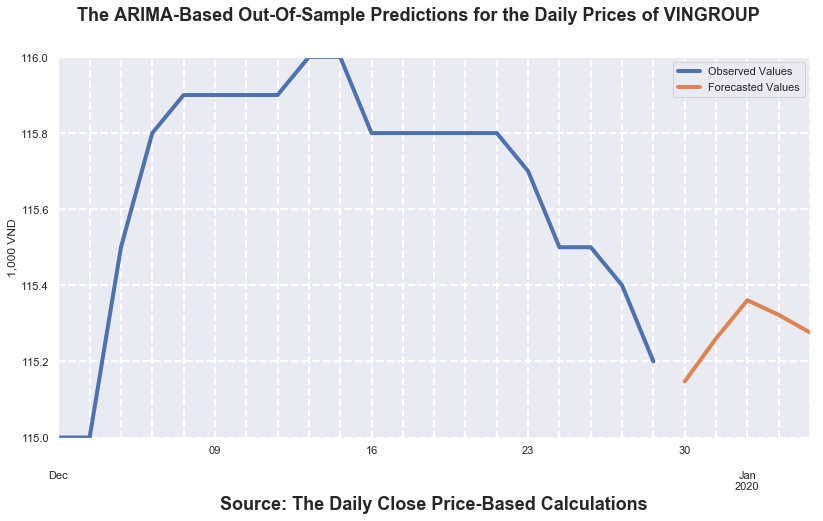

In [163]:
sns.set()
fig=plt.figure(figsize=(12,7))
ax = VIC['2019-12':'2019-12'].plot(label='Observed Values',LineWidth=4)
plt.autoscale(enable=True,axis='both',tight=True)
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted Values',LineWidth=4)
#ax.fill_between(pred_ci.index, 
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.25)
fig.suptitle('The ARIMA-Based Out-Of-Sample Predictions for the Daily Prices of VINGROUP ', fontsize=18,fontweight='bold')
plt.title('',fontsize=18,fontweight='bold')
ax.set_xlabel('Source: The Daily Close Price-Based Calculations',fontsize=18,fontweight='bold')
ax.set_ylabel('1,000 VND')
plt.grid(linestyle='--',which='both',linewidth=2)
plt.legend()
plt.show()

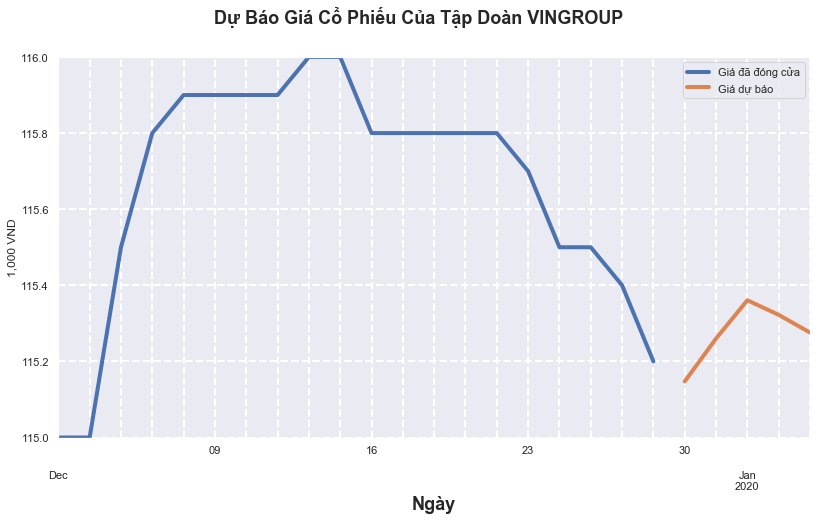

In [162]:
sns.set()
fig=plt.figure(figsize=(12,7))
ax = VIC['2019-12':'2019-12'].plot(label='Giá đã đóng cửa',LineWidth=4)
plt.autoscale(enable=True,axis='both',tight=True)
pred_uc.predicted_mean.plot(ax=ax, label='Giá dự báo',LineWidth=4)
#ax.fill_between(pred_ci.index, 
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.25)
fig.suptitle('Dự Báo Giá Cổ Phiếu Của Tập Doàn VINGROUP ', fontsize=18,fontweight='bold')
plt.title('',fontsize=18,fontweight='bold')
ax.set_xlabel('Ngày',fontsize=18,fontweight='bold')
ax.set_ylabel('1,000 VND')
plt.grid(linestyle='--',which='both',linewidth=2)
plt.legend()
plt.show()

# ---------------------------------------The End-------------------------------------